In [1]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

import warnings

from sklearn import preprocessing

In [2]:
MODEL_FILE = "1.4. Esembler_Logistic_PA_IP.json"

In [3]:
# logistische Regression
LOG_PARAMS = {
    "random_state" : 0,
    "max_iter" : 500,
    "n_jobs" : -1
}

In [4]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [5]:
# Check if Models exists

In [6]:
model_path = DATASET_DIR / "Models" / MODEL_FILE
MODEL_EXIST = model_path.is_file()

In [7]:
# Daten

In [8]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
pa_ip = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_ip.csv")
app_train = app_train.set_index("SK_ID_CURR")
pa_ip = pa_ip.set_index("SK_ID_CURR")

In [9]:
pa_ip.head()

,PA_CNT_CREDITS,PA_IP_PAYMENT_30,PA_IP_DAYS_DIFF_30,PA_IP_AMT_DIFF_30,PA_IP_PAYMENT_60,PA_IP_DAYS_DIFF_60,PA_IP_AMT_DIFF_60,PA_IP_PAYMENT_90,PA_IP_DAYS_DIFF_90,PA_IP_AMT_DIFF_90,PA_IP_PAYMENT_120,PA_IP_DAYS_DIFF_120,PA_IP_AMT_DIFF_120,PA_IP_PAYMENT_150,PA_IP_DAYS_DIFF_150,PA_IP_AMT_DIFF_150,PA_IP_PAYMENT_180,PA_IP_DAYS_DIFF_180,PA_IP_AMT_DIFF_180,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252457,1.0,-9.128709e-01,0.0,0.0,9.128709e-01,-15.0,0.0,9.128709e-01,-17.0,0.0,0.912871,-14.0,0.0,-0.912871,0.0,0.0,-0.912871,0.0,0.0,4951.350,47056.275,52641.0,4.275,47056.275,0.000088,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
256657,2.0,2.041241e-01,-6.0,0.0,2.041241e-01,-13.0,0.0,2.041241e-01,-12.0,0.0,0.204124,-12.5,0.0,0.204124,-13.0,0.0,-1.020621,-1.5,0.0,49054.770,978570.000,1198062.0,15714.000,978570.000,0.217818,2.0,7.0,5.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0
198678,2.0,4.540312e-08,-20.0,0.0,4.540312e-08,-21.5,0.0,4.540312e-08,-6.5,0.0,-0.000407,-1.0,0.0,0.000204,0.5,0.0,0.000204,-0.5,0.0,98806.050,921721.500,941661.0,13347.000,921721.500,0.193358,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394447,2.0,5.295619e-01,-0.5,0.0,6.115381e-01,-7.0,0.0,-3.183548e-01,-7.0,0.0,-0.229629,-6.5,0.0,-0.180184,-8.5,0.0,-0.412932,0.0,0.0,17141.445,129132.000,129132.0,0.000,129132.000,0.000000,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
156331,2.0,-7.381905e-01,0.0,0.0,1.416426e-02,0.0,0.0,1.416426e-02,0.0,0.0,-1.114368,-1.0,0.0,1.207845,-12.5,0.0,0.616385,-5.0,0.0,40866.795,793035.000,793035.0,0.000,793035.000,0.000000,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0


In [10]:
# Ermittlung Reihenfolge

In [11]:
y = app_train.loc[pa_ip.index]["TARGET"]
x = pa_ip

In [12]:
x_col = x.columns
x_idx = x.index

In [13]:
# Scaling

In [14]:
scaler = preprocessing.StandardScaler().fit(x)

In [15]:
x = scaler.transform(x)

In [16]:
x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx
x.head()

,PA_CNT_CREDITS,PA_IP_PAYMENT_30,PA_IP_DAYS_DIFF_30,PA_IP_AMT_DIFF_30,PA_IP_PAYMENT_60,PA_IP_DAYS_DIFF_60,PA_IP_AMT_DIFF_60,PA_IP_PAYMENT_90,PA_IP_DAYS_DIFF_90,PA_IP_AMT_DIFF_90,PA_IP_PAYMENT_120,PA_IP_DAYS_DIFF_120,PA_IP_AMT_DIFF_120,PA_IP_PAYMENT_150,PA_IP_DAYS_DIFF_150,PA_IP_AMT_DIFF_150,PA_IP_PAYMENT_180,PA_IP_DAYS_DIFF_180,PA_IP_AMT_DIFF_180,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252457,-0.585957,-0.647375,0.514629,0.002821,1.341315,-0.478727,-0.006223,1.386694,-0.557542,-0.00716,1.357379,-0.314470,0.004427,-1.531427,0.687827,-0.000444,-1.109739,0.687524,0.005446,-0.961681,-0.786819,-0.847129,-0.333597,-0.786819,-0.379502,0.222186,-0.493849,-0.395424,-1.545566,1.812330,0.554256,0.391325,-0.740679,-0.796194,0.646147,-0.474589,-0.463118
256657,1.020188,0.554116,0.048084,0.002821,0.270200,-0.335937,-0.006223,0.229130,-0.208372,-0.00716,0.192299,-0.209381,0.004427,0.157325,-0.231151,-0.000444,-1.235844,0.579465,0.005446,1.328310,1.781799,1.976594,1.895271,1.781799,3.014350,1.120549,3.111433,2.997326,0.160499,-0.458929,1.829833,3.749960,-0.740679,0.628036,0.646147,-0.474589,-0.463118
198678,1.020188,0.334550,-1.040523,0.002821,-0.038289,-0.942793,-0.006223,-0.104257,0.175714,-0.00716,-0.143922,0.596300,0.004427,-0.150977,0.723172,-0.000444,-0.041123,0.651504,0.005446,3.911556,1.625042,1.344507,1.559446,1.625042,2.633083,-0.676178,-0.493849,-0.395424,0.160499,-0.458929,-0.721322,-0.448333,-0.740679,-0.796194,-0.511842,-0.474589,-0.463118
394447,1.020188,0.904171,0.475750,0.002821,0.885916,0.092431,-0.006223,-0.624211,0.140797,-0.00716,-0.520730,0.210974,0.004427,-0.423699,0.086957,-0.000444,-0.524636,0.687524,0.005446,-0.328732,-0.560498,-0.658561,-0.334203,-0.560498,-0.380880,0.222186,-0.493849,-0.395424,1.866564,-0.458929,0.554256,0.391325,-0.740679,-0.796194,0.646147,-0.474589,-0.463118
156331,1.020188,-0.459481,0.514629,0.002821,-0.016883,0.592195,-0.006223,-0.081123,0.629635,-0.00716,-1.975117,0.596300,0.004427,1.674820,-0.195806,-0.000444,0.680024,0.327328,0.005446,0.903164,1.270193,0.978110,-0.334203,1.270193,-0.380880,1.120549,-0.493849,-0.395424,0.160499,-0.458929,0.554256,-0.448333,1.280950,-0.084079,0.646147,-0.474589,-0.463118


In [17]:
if not MODEL_EXIST:
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

    model = LogisticRegression(**LOG_PARAMS).fit(x_train, y_train)

    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print(auc)

    # Koeffizienten der einzelnen Klassen
    coef_dict = {}
    for coef, feat in zip(model.coef_[0], x_col):
        coef_dict[feat] = np.abs(coef)

    # Feature Importance
    d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
    order = list(d.keys())
    
    model_data = {
    "todo" : order,
    "keep" : [],
    "drop" : [],
    "params" : LOG_PARAMS,
    "auc" : [],
    "p" : [],
    "n" : []
    }
    
    auc_temp = 0.5

In [18]:
if MODEL_EXIST:
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'r') as file:
        model_data = json.load(file)
    auc_temp = model_data["auc"][-1]

In [19]:
#Logistische Regression Parameterbestimmung

In [20]:
df = pa_ip

print('auc: %s, todo: %s, keep: %s, drop: %s' % (round(auc_temp,4), len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"])))
todo = model_data["todo"].copy()

for head in todo:
    
    model_data["keep"].append(head)
    
    X = df[model_data["keep"]]
    y = app_train.loc[pa_ip.index]["TARGET"]
    x = X
    
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    
    model = LogisticRegression(**LOG_PARAMS).fit(x, y)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    for train, test in kfold.split(x):
        model.fit(x[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    n = len(X)
    p = len(X.columns)
    
    if auc > auc_temp:
        
        model_data["auc"].append(auc)
        model_data["p"].append(p)
        model_data["n"].append(n)
        
        auc_temp = auc
        
    else:
        model_data["keep"].remove(head)
        model_data["drop"].append(head)
    
    model_data["todo"].remove(head)
    
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'w') as file:
        json.dump(model_data, file)
    
    clear_output(wait=True)
    print('auc: %s, todo: %s, keep: %s, drop: %s' % (round(auc,4), len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"])))

auc: 0.6294, todo: 0, keep: 24, drop: 13


         auc   p       n
23  0.629377  24  179175


<AxesSubplot:>

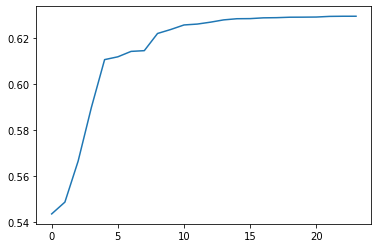

In [21]:
data = {
    "auc" : model_data["auc"],
    "p" : model_data["p"],
    "n" : model_data["n"]
}

result = pd.DataFrame(data)

print(result[result["auc"] == result["auc"].max()])
result["auc"].plot()

In [22]:
model_data["keep"]

['PA_AMT_ANNUITY',
 'PA_AMT_CREDIT',
 'PA_CNT_CREDITS',
 'PA_CNT_NAME_CONTRACT_STATUS_Refused',
 'PA_CNT_NAME_YIELD_GROUP_low_normal',
 'PA_CNT_NAME_CONTRACT_TYPE_Revolving loans',
 'PA_IP_DAYS_DIFF_60',
 'PA_CNT_NAME_PORTFOLIO_Cards',
 'PA_CNT_NAME_CLIENT_TYPE_New',
 'PA_CNT_PRODUCT_COMBINATION_POS industry with interest',
 'PA_CNT_NAME_PRODUCT_TYPE_walk-in',
 'PA_CNT_NAME_CLIENT_TYPE_Refreshed',
 'PA_AMT_APPLICATION',
 'PA_AMT_DOWN_PAYMENT',
 'PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low',
 'PA_RATE_DOWN_PAYMENT',
 'PA_IP_DAYS_DIFF_180',
 'PA_IP_DAYS_DIFF_90',
 'PA_IP_PAYMENT_180',
 'PA_IP_DAYS_DIFF_150',
 'PA_IP_PAYMENT_120',
 'PA_IP_PAYMENT_60',
 'PA_IP_PAYMENT_150',
 'PA_IP_DAYS_DIFF_30']

In [23]:
model_data["drop"]

['PA_IP_AMT_DIFF_150',
 'PA_AMT_GOODS_PRICE',
 'PA_IP_AMT_DIFF_180',
 'PA_IP_AMT_DIFF_90',
 'PA_IP_AMT_DIFF_30',
 'PA_IP_AMT_DIFF_60',
 'PA_CNT_PRODUCT_COMBINATION_Card Street',
 'PA_IP_AMT_DIFF_120',
 'PA_IP_DAYS_DIFF_120',
 'PA_CNT_NAME_YIELD_GROUP_high',
 'PA_IP_PAYMENT_90',
 'PA_IP_PAYMENT_30',
 'PA_CNT_CODE_REJECT_REASON_HC']

In [24]:
model = LogisticRegression(**LOG_PARAMS)

TPRs = []
TNRs = []
Ps = []
NPVs = []
Fs = []
As = []
aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[model_data["keep"]]

y = app_train.loc[pa_ip.index]["TARGET"]
x = df[model_data["keep"]]

for ID_TRAIN, ID_TEST in kfold.split(data):
    
    x_train = x.iloc[ID_TRAIN]
    y_train = y.iloc[ID_TRAIN]
    x_test = x.iloc[ID_TEST]
    y_test = y.iloc[ID_TEST]
    
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    scaler = preprocessing.StandardScaler().fit(x_test)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)
    (tn,fp),(fn,tp)=confusion_matrix(y_test, model.predict(x_test))
    
    # TPR
    TPR = R = tp/(tp+fn)
    # TNR
    TNR = tn/(tn+fp)
    # Precision
    P = tp/(tp+fp)
    # NPV
    NPV = tn/(tn+fn)
    # F-Score
    F = 2*P*R/(P+R)
    # Accuracy
    A = (tp+tn)/(tp+tn+fp+fn)
    # AUC
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    
    TPRs.append(TPR)
    TNRs.append(TNR)
    Ps.append(P)
    NPVs.append(NPV)
    Fs.append(F)
    As.append(A)
    aucs.append(auc)
    
    print('TPR: %.4f' % TPR, 'TNR: %.4f' % TNR, 'P: %.4f' % P, 'NPV: %.4f' % NPV, 'F: %.4f' % F, 'Accuracy: %.4f' % A, 'AUC: %.4f' % auc)

print("\n")
print("Durchschnitte:")
print('TPR: %.4f' % np.mean(TPRs), 'TNR: %.4f' % np.mean(TNRs), 'P: %.4f' % np.mean(Ps), 'NPV: %.4f' % np.mean(NPVs), 'F: %.4f' % np.mean(Fs), 'Accuracy: %.4f' % np.mean(As), 'AUC: %.4f' % np.mean(aucs))

TPR: 0.0014 TNR: 0.9997 P: 0.2857 NPV: 0.9196 F: 0.0028 Accuracy: 0.9193 AUC: 0.6258
TPR: 0.0010 TNR: 0.9995 P: 0.1667 NPV: 0.9173 F: 0.0020 Accuracy: 0.9169 AUC: 0.6378
TPR: 0.0007 TNR: 0.9996 P: 0.1333 NPV: 0.9191 F: 0.0014 Accuracy: 0.9188 AUC: 0.6298
TPR: 0.0017 TNR: 0.9994 P: 0.2083 NPV: 0.9198 F: 0.0034 Accuracy: 0.9194 AUC: 0.6249
TPR: 0.0021 TNR: 0.9998 P: 0.4286 NPV: 0.9199 F: 0.0042 Accuracy: 0.9197 AUC: 0.6281


Durchschnitte:
TPR: 0.0014 TNR: 0.9996 P: 0.2445 NPV: 0.9191 F: 0.0027 Accuracy: 0.9188 AUC: 0.6293
